<a href="https://colab.research.google.com/github/moumahan1990/AV_Gamereview/blob/master/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [114]:
import pandas as pd
import numpy as np

import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger') 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [0]:
train_df  = pd.read_csv("https://raw.githubusercontent.com/moumahan1990/AV_Gamereview/master/data/train.csv", low_memory=False)
game_df = pd.read_csv("https://raw.githubusercontent.com/moumahan1990/AV_Gamereview/master/data/game_overview.csv")

In [10]:
train_df['user_review'][0]

"I'm scared and hearing creepy voices.  So I'll pause for a moment and write a review while I wait for my heart beat to return to atleast somewhat calmer times.  This game is adorable and creepy like my happy tree friends but with the graphics sceme of my childhood (but more bubble and 'clean').  Hello 1990's.What charactes there are (that isnot trying to kill me) were likable and a bit odd.  I did do a few noob things though, such as:Oh look a class room full of ghosts from dead children, lets shine my flashlight on them and stand there staring at them..Or, hmm creepy music, I'll turn around and see if I can see what's chasing me.Never before in a game have I been this afraid of finding a locked door."

In [0]:
# Find unique tags
total = []
tags = []
for ll in game_df['tags']:
  A_list = []
  A = ll.replace("[","").replace("]","").replace("\'","").split(",")
  for item in A:
    A_list.append(item.lower().strip())
    item = item.lower()
    tags.append(item.strip())
  total.append(A_list)

game_df['new_tag'] = total

In [81]:
game_df['new_tag']

0     [horror, free to play, cute, first-person, sin...
1     [nudity, anime, free to play, mature, sexual c...
2     [early access, free to play, fps, multiplayer,...
3     [space, multiplayer, free to play, pvp, moba, ...
4     [fps, multiplayer, shooter, action, team-based...
                            ...                        
59    [free to play, tower defense, multiplayer, str...
60    [early access, free to play, battle royale, su...
61    [free to play, strategy, multiplayer, action, ...
62    [free to play, dragons, adventure, multiplayer...
63    [free to play, massively multiplayer, rpg, mmo...
Name: new_tag, Length: 64, dtype: object

In [73]:
vocab_tags = set(tags)
len(vocab_tags)

161

In [0]:
#Create dictionary with tags
word2count = {} 
for tags in game_df['new_tag']: 
    words = tags
    for word in words: 
        if word not in word2count.keys(): 
            word2count[word] = 1
        else: 
            word2count[word] += 1

In [0]:
#Create BOW array
X = [] 
for tags in game_df['new_tag']:
    vector = [] 
    for word in word2count: 
        if word in tags: 
            vector.append(1) 
        else: 
            vector.append(0) 
    X.append(vector) 
X = np.asarray(X) 


In [86]:
X[0]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0])

In [69]:
train_df[]

,review_id,title,year,user_review,user_suggestion
0,1,Spooky's Jump Scare Mansion,2016.0,I'm scared and hearing creepy voices. So I'll...,1
1,2,Spooky's Jump Scare Mansion,2016.0,"Best game, more better than Sam Pepper's YouTu...",1
2,3,Spooky's Jump Scare Mansion,2016.0,"A littly iffy on the controls, but once you kn...",1
3,4,Spooky's Jump Scare Mansion,2015.0,"Great game, fun and colorful and all that.A si...",1
4,5,Spooky's Jump Scare Mansion,2015.0,Not many games have the cute tag right next to...,1
...,...,...,...,...,...
17489,25535,EverQuest II,2012.0,Arguably the single greatest mmorp that exists...,1
17490,25536,EverQuest II,2017.0,"An older game, to be sure, but has its own cha...",1
17491,25537,EverQuest II,2011.0,When I frist started playing Everquest 2 it wa...,1
17492,25538,EverQuest II,NaN,cool game. THe only thing that REALLY PISSES M...,1


In [0]:
import re
train_df['new_review'] = train_df.user_review.str.replace('[^a-zA-Z]', ' ')

train_df['new_review'] = train_df.new_review.apply(lambda x : x.lower().strip())


In [103]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(analyzer='word',stop_words='english')
X = vectorizer.fit_transform(train_df.new_review)
print(vectorizer.get_feature_names())

['aa', 'aaa', 'aaaa', 'aaaaaa', 'aaaaaaaaa', 'aaaaaaaaaaaaaa', 'aaaaaaaaaaaaaaaaaaaaa', 'aaaaaaaaaaaaaaaaaaaaaaaaa', 'aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa

In [0]:
review_list = train_df.user_review.to_list()

In [0]:
# Constants
# POS (Parts Of Speech) for: nouns, adjectives, verbs and adverbs
DI_POS_TYPES = {'NN':'n', 'JJ':'a', 'VB':'v', 'RB':'r'} 
POS_TYPES = list(DI_POS_TYPES.keys())

# Constraints on tokens
MIN_STR_LEN = 3
RE_VALID = '[a-zA-Z]'

In [0]:
# Get stopwords, stemmer and lemmatizer
import unicodedata
import re
import string

stopwords = nltk.corpus.stopwords.words('english')
stemmer = nltk.stem.PorterStemmer()
lemmatizer = nltk.stem.WordNetLemmatizer()

# Remove accents function
def remove_accents(data):
    return ''.join(x for x in unicodedata.normalize('NFKD', data) if x in string.ascii_letters or x == " ")

# Process all quotes
li_tokens = []
li_token_lists = []
li_lem_strings = []

for i,text in enumerate(review_list):
    # Tokenize by sentence, then by lowercase word
    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]

    # Process all tokens per quote
    li_tokens_quote = []
    li_tokens_quote_lem = []
    for token in tokens:
        # Remove accents
        t = remove_accents(token)

        # Remove punctuation
        t = str(t).translate(string.punctuation)
        li_tokens_quote.append(t)
        
        # Add token that represents "no lemmatization match"
        li_tokens_quote_lem.append("-") # this token will be removed if a lemmatization match is found below

        # Process each token
        if t not in stopwords:
            if re.search(RE_VALID, t):
                if len(t) >= MIN_STR_LEN:
                    # Note that the POS (Part Of Speech) is necessary as input to the lemmatizer 
                    # (otherwise it assumes the word is a noun)
                    pos = nltk.pos_tag([t])[0][1][:2]
                    pos2 = 'n'  # set default to noun
                    if pos in DI_POS_TYPES:
                      pos2 = DI_POS_TYPES[pos]
                    
                    stem = stemmer.stem(t)
                    lem = lemmatizer.lemmatize(t, pos=pos2)  # lemmatize with the correct POS
                    
                    if pos in POS_TYPES:
                        li_tokens.append((t, stem, lem, pos))

                        # Remove the "-" token and append the lemmatization match
                        li_tokens_quote_lem = li_tokens_quote_lem[:-1] 
                        li_tokens_quote_lem.append(lem)

    # Build list of token lists from lemmatized tokens
    li_token_lists.append(li_tokens_quote)
    
    # Build list of strings from lemmatized tokens
    str_li_tokens_quote_lem = ' '.join(li_tokens_quote_lem)
    li_lem_strings.append(str_li_tokens_quote_lem)
    

In [119]:
# Build resulting dataframes from lists
df_token_lists = pd.DataFrame(li_token_lists)

print("df_token_lists.head(5):")
print(df_token_lists.head(5).to_string())

# Replace None with empty string
for c in df_token_lists:
    if str(df_token_lists[c].dtype) in ('object', 'string_', 'unicode_'):
        df_token_lists[c].fillna(value='', inplace=True)

df_lem_strings = pd.DataFrame(li_lem_strings, columns=['lem quote'])

print()
print("")
print("df_lem_strings.head():")
print(df_lem_strings.head().to_string())

df_token_lists.head(5):
       0       1       2     3        4         5       6       7      8        9       10      11      12    13      14     15      16       17        18     19            20     21         22      23          24     25                         26      27      28       29        30        31       32             33    34      35   36        37   38      39     40           41       42    43            44         45          46   47        48         49         50      51           52      53         54      55      56          57      58   59      60    61     62       63         64        65        66      67        68      69       70          71    72    73    74     75       76    77    78    79    80      81          82    83    84    85    86    87      88      89    90    91    92    93    94    95    96     97    98    99   100     101   102   103       104   105   106    107   108         109   110   111   112    113    114      115   116     117   118 

In [0]:
train_df['review_lemma'] = li_lem_strings
train_df['review'] = df_token_lists.values.tolist()

In [134]:
# Add counts
print("Group by lemmatized words, add count and sort:")
df_all_words = pd.DataFrame(li_tokens, columns=['token', 'stem', 'lem', 'pos'])
df_all_words['counts'] = df_all_words.groupby(['lem'])['lem'].transform('count')
df_all_words = df_all_words.sort_values(by=['counts', 'lem'], ascending=[False, True]).reset_index()

print("Get just the first row in each lemmatized group")
df_words = df_all_words.groupby('lem').first().sort_values(by='counts', ascending=False).reset_index()
print("df_words.head(10):")
print(df_words.head(20))

Group by lemmatized words, add count and sort:
Get just the first row in each lemmatized group
df_words.head(10):
       lem  index   token    stem pos  counts
0     game     16    game    game  NN   56569
1     play     72    play    play  NN   16641
2      get     82     get     get  VB   16551
3     make     98    made    made  VB    8889
4     time     15   times    time  NN    8796
5     good    166    good    good  JJ    7634
6   access    180  access  access  NN    6913
7    early    179   early   earli  RB    6901
8      fun    122     fun     fun  NN    6810
9     well     66  better  better  RB    6736
10  player   1485  player  player  NN    6494
11    even    309    even    even  RB    6370
12  really    142  really  realli  RB    6065
13    want   1138    want    want  NN    5175
14    free    167    free    free  JJ    5119
15     new    307     new     new  JJ    4847
16   thing     37  things   thing  NN    4823
17  people    215  people   peopl  NN    4692
18    much  

In [135]:
df_words = df_words[['lem', 'pos', 'counts']].head(200)
for v in POS_TYPES:
    df_pos = df_words[df_words['pos'] == v]
    print()
    print("POS_TYPE:", v)
    print(df_pos.head(10).to_string())


POS_TYPE: NN
       lem pos  counts
0     game  NN   56569
1     play  NN   16641
4     time  NN    8796
6   access  NN    6913
8      fun  NN    6810
10  player  NN    6494
13    want  NN    5175
16   thing  NN    4823
17  people  NN    4692
22   money  NN    4400

POS_TYPE: JJ
          lem pos  counts
5        good  JJ    7634
14       free  JJ    5119
15        new  JJ    4847
18       much  JJ    4636
25      great  JJ    4232
33        bad  JJ    3849
42       many  JJ    3172
56       best  JJ    2577
83  different  JJ    2006
84       real  JJ    2000

POS_TYPE: VB
      lem pos  counts
2     get  VB   16551
3    make  VB    8889
19    try  VB    4435
20    say  VB    4410
21   give  VB    4410
29   take  VB    4072
34    see  VB    3794
38  start  VB    3498
39   feel  VB    3375
41     go  VB    3216

POS_TYPE: RB
       lem pos  counts
7    early  RB    6901
9     well  RB    6736
11    even  RB    6370
12  really  RB    6065
27   still  RB    4160
32    also  RB    3919
43

[('good', 7610), ('free', 5118), ('new', 4847), ('much', 4636), ('great', 4227), ('bad', 3847), ('many', 3172), ('best', 2572), ('different', 2006), ('real', 2000), ('little', 1767), ('high', 1746), ('big', 1639), ('easy', 1623), ('nice', 1519), ('hard', 1418), ('able', 1181), ('old', 1174), ('least', 1138), ('full', 1038), ('low', 1018), ('single', 935), ('last', 931), ('overall', 910), ('small', 862), ('next', 803), ('huge', 763), ('due', 737), ('whole', 714), ('terrible', 673), ('main', 644), ('large', 640), ('open', 632), ('potential', 618), ('certain', 611), ('casual', 586), ('wrong', 583), ('active', 561), ('enjoyable', 558), ('complete', 540), ('short', 524), ('actual', 524), ('second', 521), ('negative', 521), ('realistic', 510), ('available', 506), ('russian', 505), ('competitive', 491), ('similar', 481), ('current', 479), ('stupid', 477), ('possible', 465), ('several', 460), ('strong', 460), ('massive', 447), ('expensive', 443), ('original', 442), ('basic', 440), ('entire', 4

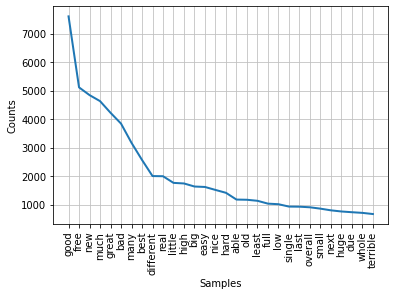

In [139]:
df_filter = df_all_words[df_all_words['pos'] == 'JJ']

li_lem_words = df_filter['lem'].tolist()
di_freq2 = nltk.FreqDist(li_lem_words)
li_freq_sorted2 = sorted(di_freq2.items(), key=lambda x: x[1], reverse=True)  # sorted list
print(li_freq_sorted2)
    
di_freq2.plot(30, cumulative=False)